# Bài 5: Phân tích đa biến

Trong tuần này, chúng ta sẽ đề cập đến việc thực hiện một phân tích để hiểu mối tương quan giữa các biến trong một bảng dữ liệu. Mục tiêu của phân tích này là để xác định các mối quan hệ giữa các biến và từ đó, chúng ta có thể lựa chọn những đặc trưng quan trọng nhất để giải quyết một bài toán cụ thể.

- "Phân tích mối tương quan" đề cập đến việc nghiên cứu cách các biến trong tập dữ liệu tương tác với nhau. Chúng ta sẽ xem xét liệu có mối liên hệ tương quan, tương phản hoặc đồng biến giữa các biến. Điều này có thể giúp chúng ta hiểu rõ cách mà các biến ảnh hưởng đến nhau và tạo ra cái nhìn tổng quan về dữ liệu.

- Mục tiêu của phân tích này là để xác định những đặc trưng quan trọng và ảnh hưởng nhất đối với một bài toán cụ thể. Chúng ta có thể chọn lựa những biến có mối tương quan mạnh với biến mục tiêu hoặc loại bỏ những biến không cung cấp thông tin quan trọng.

Phân tích đa biến có thể giúp chúng ta hiểu rõ dữ liệu hơn và tối ưu hóa việc lựa chọn các đặc trưng cho mô hình máy học, giúp đạt được hiệu suất tốt hơn trong việc giải quyết một bài toán cụ thể.

Đầu tiên, tương tự như các bài tập trước, ta sẽ import những thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

Ở bài này, chúng ta sẽ thực hiện một phần quan trọng trong quá trình EDA (Exploratory Data Analysis) cho mục tiêu làm dự đoán. Cụ thể:

- **Output (giá trị cần dự đoán)** là cột "Survived," tức là chúng ta sẽ cố gắng dự đoán liệu một hành khách trên tàu Titanic có sống sót ("Survived" = 1) hay không sống sót ("Survived" = 0) dựa trên thông tin khác nhau.

- **Các feature còn lại**, ví dụ như "Pclass," "Name," "Sex," "Age," và có thể nhiều feature khác, đóng vai trò là thông tin đầu vào của mô hình. Chúng ta sẽ sử dụng các thông tin này để xây dựng mô hình dự đoán.

Điều đầu tiên cần thực hiện là đọc tập dữ liệu từ một file CSV bằng sử dụng thư viện `pandas`. Sau đó, chúng ta sẽ lưu dữ liệu vào một biến được đặt tên là `df`.

In [2]:
### BEGIN SOLUTION
df = pd.read_csv("data/train.csv")
### END SOLUTION
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 1. Thống kê phân bố theo giá trị output

Tiếp theo, ta phân tích output feature có tên là `Survived` để quan sát tập giá trị đầu ra và phân bố của các giá trị này:

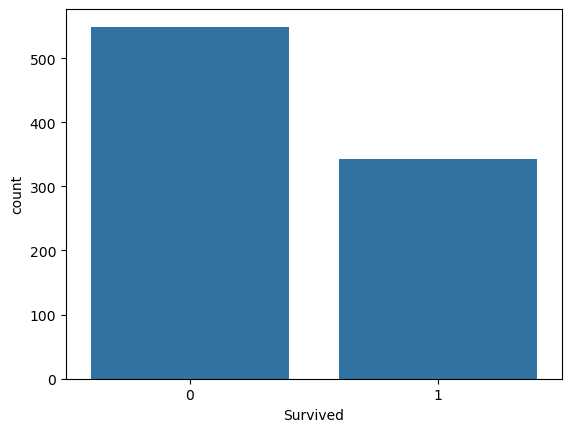

In [3]:
sns.countplot(x=df['Survived']);

Dựa vào biểu đồ, chúng ta có thể xác định rằng bài toán này là một bài toán phân loại nhị phân (binary classification), có hai nhãn đầu ra cần dự đoán, và chúng là "0" và "1." Trong trường hợp này, chúng ta đang nghiên cứu việc liệu một hành khách trên tàu Titanic có sống sót ("Survived" = 1) hay không sống sót ("Survived" = 0). Điều đáng chú ý là tỷ lệ hành khách không sống sót (nhãn 0) lớn hơn so với tỷ lệ sống sót (nhãn 1).

Tiếp theo, chúng ta sẽ thực hiện phân tích để xem xem những cột dữ liệu còn lại có mối quan hệ với cột "Survived" hay không. Bước đầu tiên trong phân tích này là thực hiện thống kê phân bố của nhãn "Survived" theo giới tính ("Sex"). Điều này giúp chúng ta hiểu rõ cách giới tính của hành khách có thể ảnh hưởng đến khả năng sống sót trên tàu.

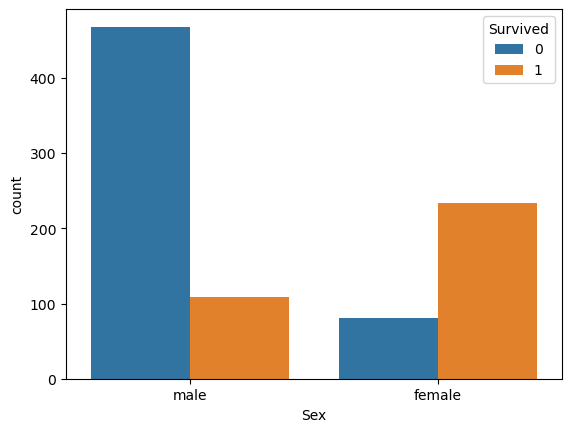

In [4]:
sns.countplot(x=df['Sex'], hue=df['Survived']);

**Nhận xét**: Dựa vào biểu đồ trên, ta thấy tỉ lệ nữ còn sống so với nữ đã mất cao hơn tỉ lệ đó trên tập nam giới.

Ta thấy việc phân tích từng cột thế này **quá mất thời gian**, ta quyết định phân tích và hiển thị cùng lúc tất cả các cột có dạng dữ liệu Category hoặc những cột dạng Numerical mà ít labels như: [`Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`] bằng hàm `countplot` của thư viện `seaborn` và `subplot` của thư viện `matplotlib`.

Dựa vào biểu đồ trên, chúng ta có thể rút ra một số nhận xét quan trọng. Tỷ lệ số hành khách nữ sống sót (nhãn 1) cao hơn so với tỷ lệ số hành khách nam sống sót. Điều này cho thấy rằng giới tính của hành khách có thể ảnh hưởng đáng kể đến khả năng sống sót trên tàu Titanic.

Tuy nhiên, việc phân tích từng cột một như trên là một quá trình tốn thời gian. Vì vậy, chúng ta quyết định thực hiện phân tích và hiển thị cùng lúc tất cả các cột có dạng dữ liệu Category hoặc những cột dạng Numeric như `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` bằng việc sử dụng hàm `countplot` từ thư viện `seaborn` và sử dụng `subplot` từ thư viện `matplotlib`.

Để thực hiện điều này, chúng ta sẽ tạo ra một lưới 2x3 subplot, tức là có 2 dòng và 3 cột, tương ứng với 6 ô. Sau đó, chúng ta duyệt qua từng ô từ trên xuống dưới, từ trái qua phải và sử dụng hàm `sns.countplot(x=..., hue=..., ax=...)` để vẽ biểu đồ phân tích cho từng biến đầu vào. Tham số `x` sẽ đại diện cho các cột từ danh sách đã cho, `hue` sẽ là cột "Survived" để so sánh, và `ax` sẽ là ô subplot tương ứng.

Ngoài ra, chúng ta cũng cần xóa ô cuối cùng (với danh sách ít điểm dữ liệu hơn) bằng cách sử dụng hàm `set_visible` để đảm bảo chỉ hiển thị 5 biểu đồ thay vì 6, bởi vì số lượng biểu đồ cần hiển thị chỉ có 5.

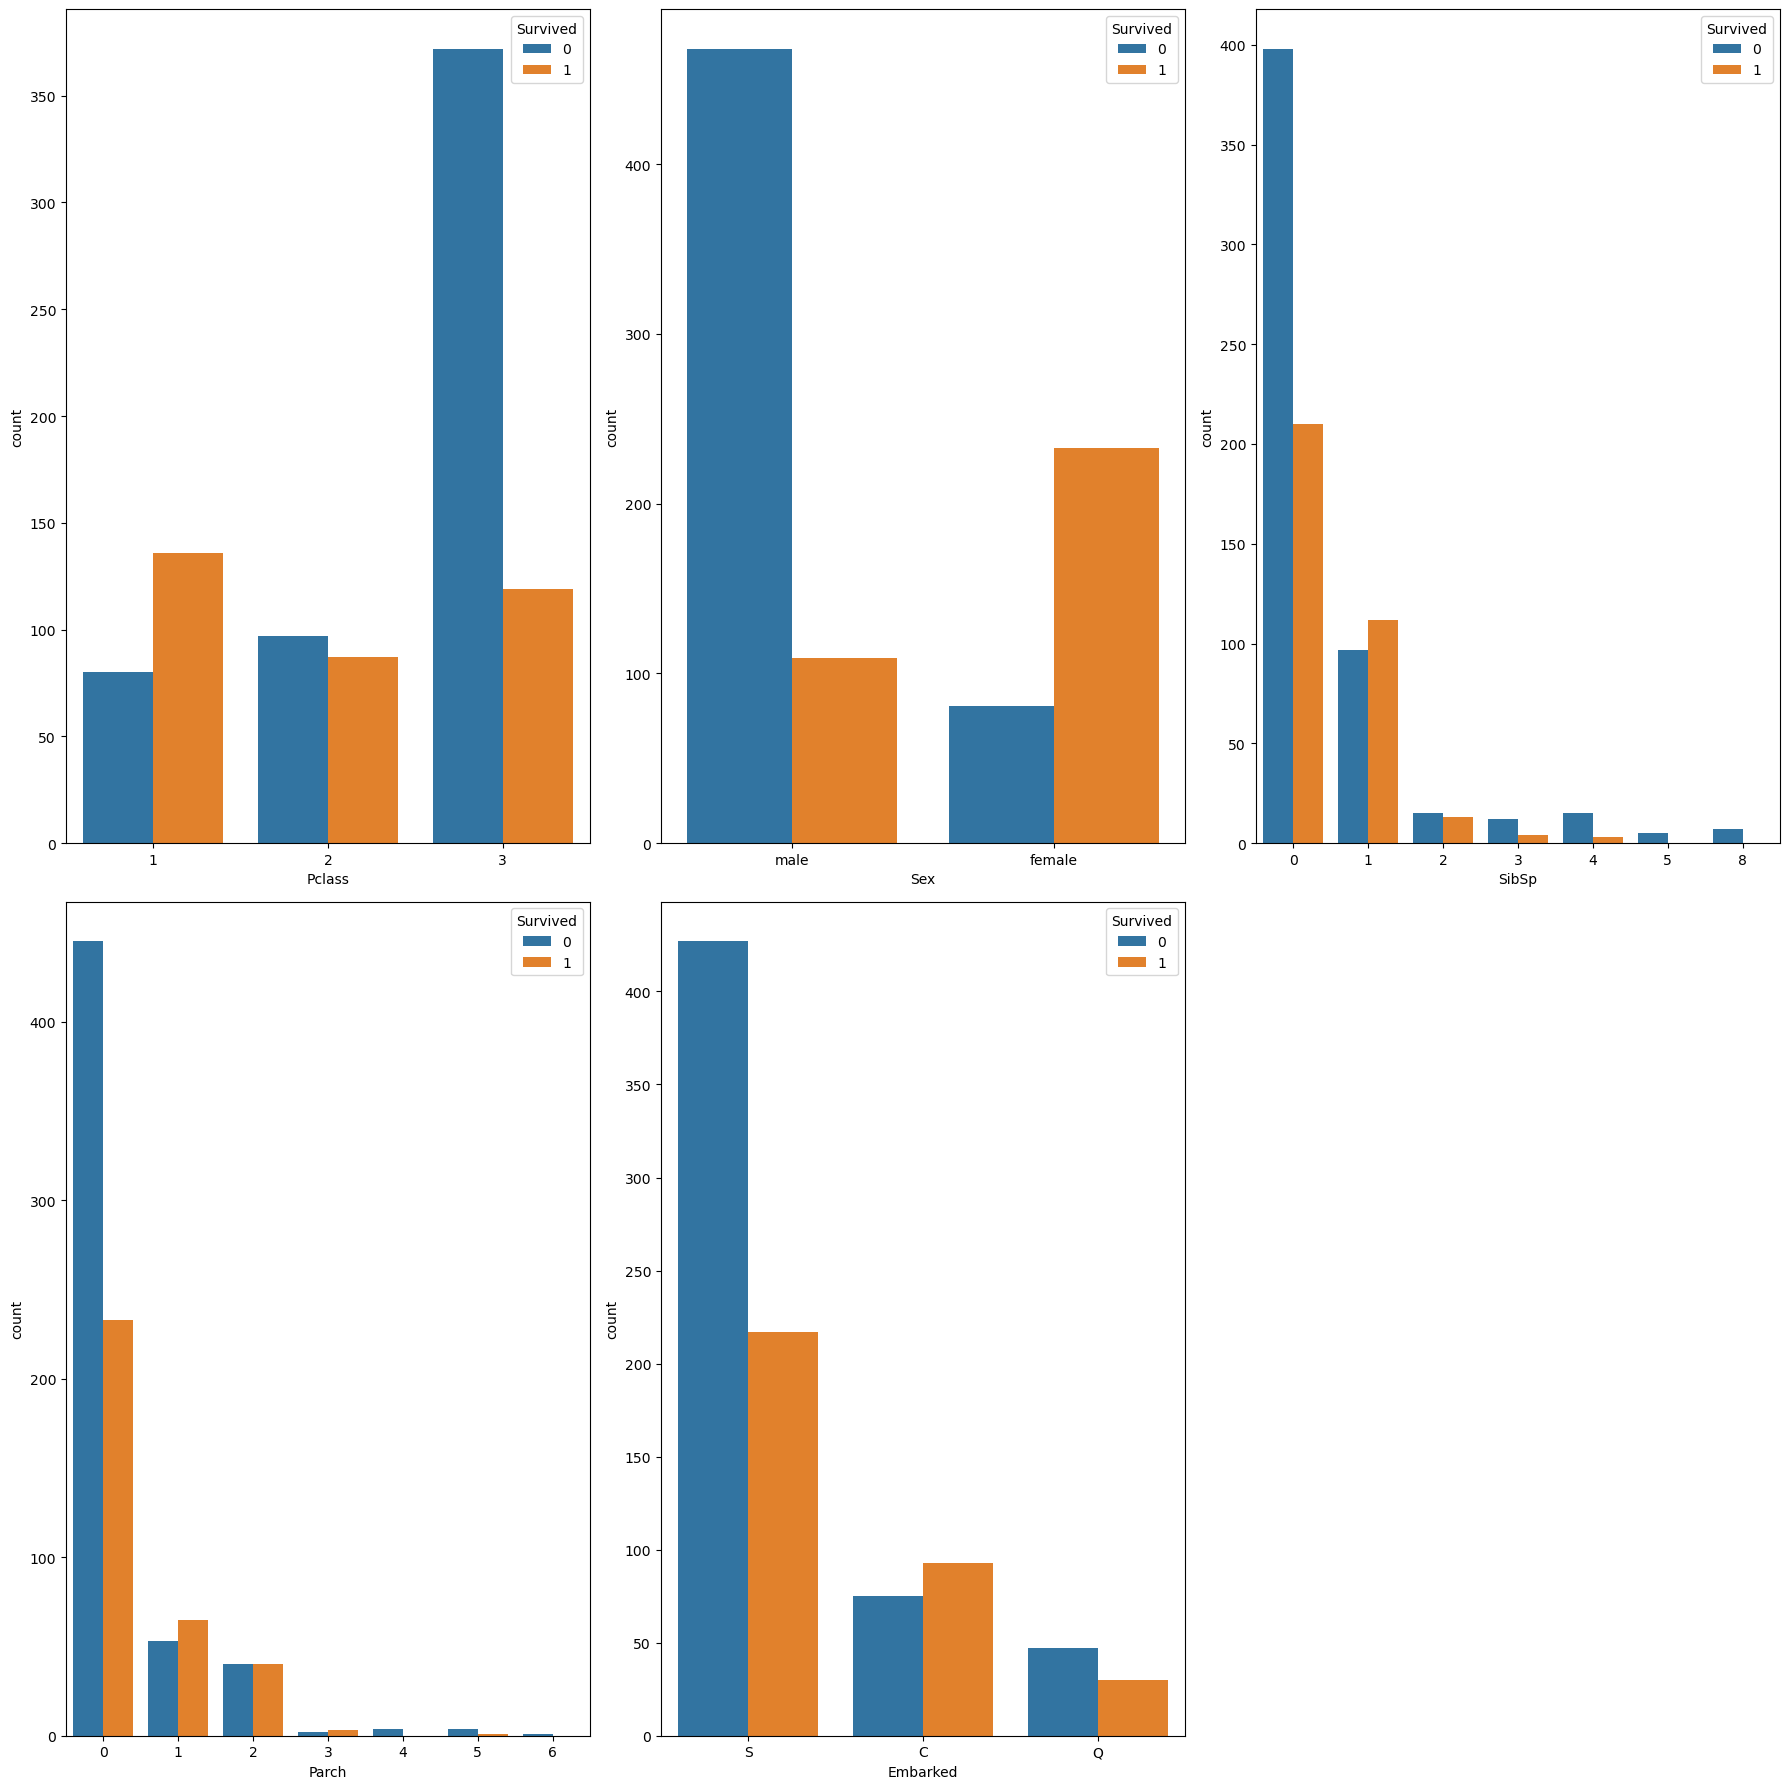

In [10]:
# Danh sách  5 cột cần hiển thị theo thứ tự
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
# Tạo subplot kích thước 2 x 3
fig, ax = plt.subplots(2,3,figsize=(18, 18))
index = 0

### BEGIN SOLUTION
for i, column in enumerate(cols):
    sns.countplot(x=df[column], hue=df["Survived"], ax=ax[i // 3, i % 3])
### END SOLUTION
# Xóa ô cuối cùng vì chỉ có 5 cột cần hiển thị
ax.flat[-1].set_visible(False)
plt.tight_layout()
# Lưu thành file ảnh kết quả
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image1 = Image.open(buf)
plt.show()

Dựa vào biểu đồ và phân tích, chúng ta có thể rút ra một số nhận xét quan trọng về các biến đầu vào:

- Ở cột "Pclass" (hạng ghế):
    - Hạng ghế Class 3 có tỷ lệ chết (0) cao hơn đáng kể so với tỷ lệ sống (1).
    - Hạng ghế Class 2 có tỷ lệ chết và sống gần như bằng nhau.
    - Hạng ghế Class 1 có tỷ lệ sống cao hơn so với các hạng ghế khác.

- Ở cột "SibSp" (số anh chị/em ruột):
    - Đa số trường hợp với giá trị SibSp bằng 0 có tỷ lệ chết (0) cao hơn đáng kể so với tỷ lệ sống (1).
    - Riêng ở các trường hợp có giá trị SibSp bằng 1, tỷ lệ sống (1) có vẻ cao hơn đôi chút.

- Ở cột "Parch" (số người thân gia đình):
    - Tương tự như SibSp, đa số trường hợp với giá trị Parch bằng 0 có tỷ lệ chết (0) cao hơn đáng kể so với tỷ lệ sống (1).
    - Riêng ở các trường hợp có giá trị Parch bằng 1, tỷ lệ sống (1) có vẻ cao hơn đôi chút.

- Ở cột "Embarked" (cảng lên tàu):
    - Tương tự như các cột trước, ở cột "Embarked," tỷ lệ chết (0) vẫn trội hơn so với tỷ lệ sống (1).

Ngoài ra, có một điểm đáng chú ý là cột "SibSp" và "Parch" có sự tương đồng đáng kể trong việc ảnh hưởng đến cột "Survived." Cả hai đều liên quan đến số lượng người thân gia đình trên tàu. Điều này có thể gợi ý rằng có thể kết hợp hoặc tổng hợp thông tin từ cả hai cột này để tạo ra một đặc trưng mới hoặc giảm thiểu sự trùng lặp thông tin.

Tiếp theo, chúng ta tiến hành phân tích những cột dữ liệu ['Age', 'Fare']. Đây là các dữ liệu dạng số (numerical), và việc sử dụng hàm `countplot` như trước sẽ làm cho việc quan sát và phân tích trở nên khó khăn.

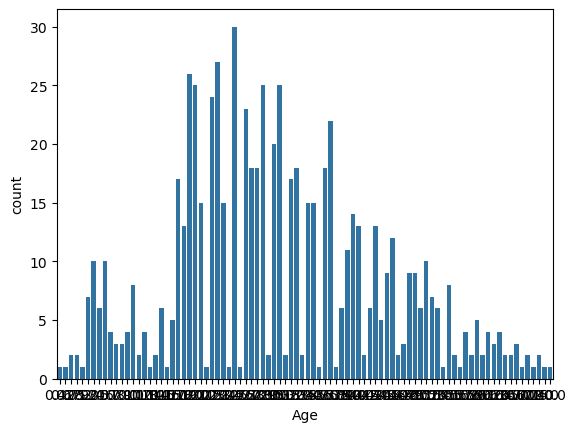

In [11]:
sns.countplot(x=df['Age']);

Thay vào đó, chúng ta sẽ sử dụng hàm `histplot` từ thư viện `seaborn` để thực hiện phân tích.

Để sử dụng hàm `histplot`, chúng ta cần truyền vào các tham số sau:
- Tham số `x` là cột "Age" hoặc "Fare," tùy thuộc vào biến cần phân tích.
- Tham số `hue` là cột "Survived" để so sánh biểu đồ phân phối của cột "Age" hoặc "Fare" theo sự sống sót hoặc chết.
- Tham số `kde=True` để hiển thị đường phân bố liên tục kèm theo biểu đồ.

Kết quả của việc thực hiện hàm `histplot` này sẽ được lưu trong biến `check1_sv`. Điều này giúp chúng ta có cái nhìn chi tiết hơn về phân phối của các biến số (numerical) "Age" và "Fare" dựa trên sự sống sót hoặc chết của hành khách.

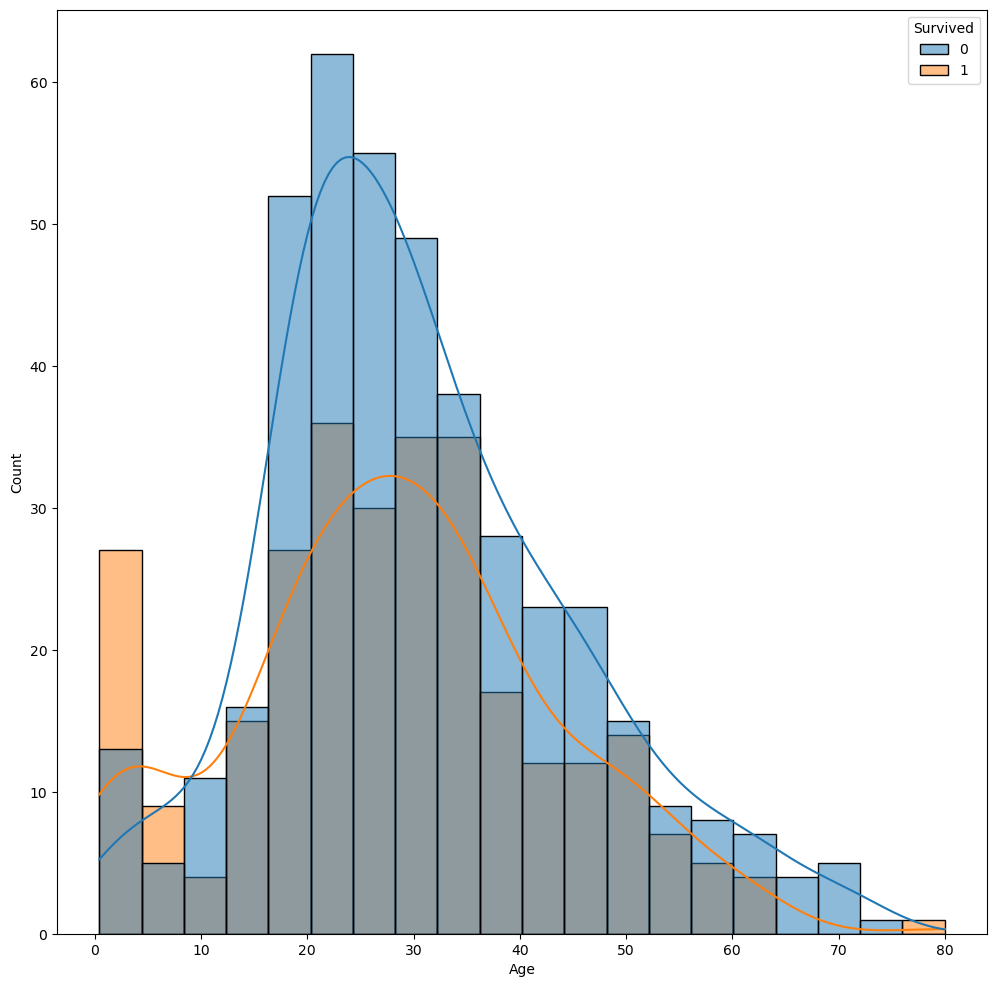

In [12]:
plt.figure(figsize=(12, 12))
### BEGIN SOLUTION
check1_sv = sns.histplot(x=df["Age"], hue=df["Survived"], kde=True)
### END SOLUTION
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
check1_sv = Image.open(buf)
plt.show()

**Nhận xét**: Ta có thể nhận xét, từ khoảng 0 đến 10 tuổi thì tỉ lệ sống sót cao hơn tỉ lệ mất.

Tương tự, ta sẽ phân tích cột `Fare` so với cột output `Survived`:

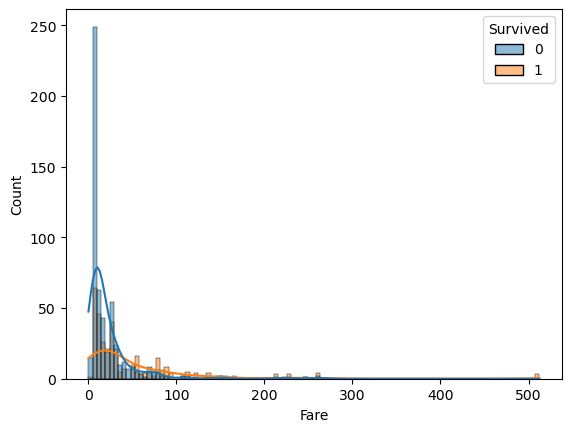

In [13]:
sns.histplot(x=df['Fare'], hue=df['Survived'], kde=True);

## **Nhận Xét**
Dựa vào phân tích trước đó bằng `histplot`, chúng ta đã nhận thấy rằng biểu đồ có thể khá khó nhìn và phân tích do sự biến động liên tục của dữ liệu "Fare." Do đó, để đơn giản hóa quá trình phân tích, chúng ta quyết định sử dụng phương pháp binning Quantile.

Chúng ta sẽ sử dụng hàm `countplot` từ thư viện `Seaborn` để thực hiện phân tích bằng phương pháp binning Quantile. Để thực hiện điều này, chúng ta cần truyền vào các tham số sau:

- Tham số `x` sẽ là biến `bins`, và biến này chứa kết quả của quá trình binning (phân chia thành các khoảng dựa trên quantile), đã được chuẩn bị trước.
- Tham số `hue` sẽ là cột "Survived" để so sánh biểu đồ phân phối của biến `bins` dựa trên sự sống sót hoặc chết của hành khách.

Kết quả của quá trình phân tích này sẽ được lưu vào biến `check2_sv`. Bằng cách này, chúng ta có thể quan sát và so sánh phân phối của các biến "Age" và "Fare" theo sự sống sót hoặc chết của hành khách một cách dễ dàng hơn và rõ ràng hơn.

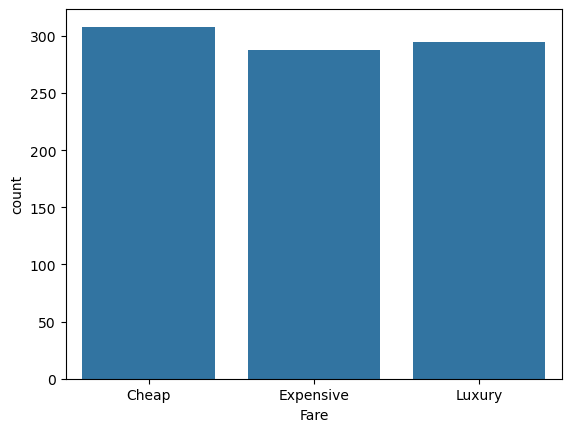

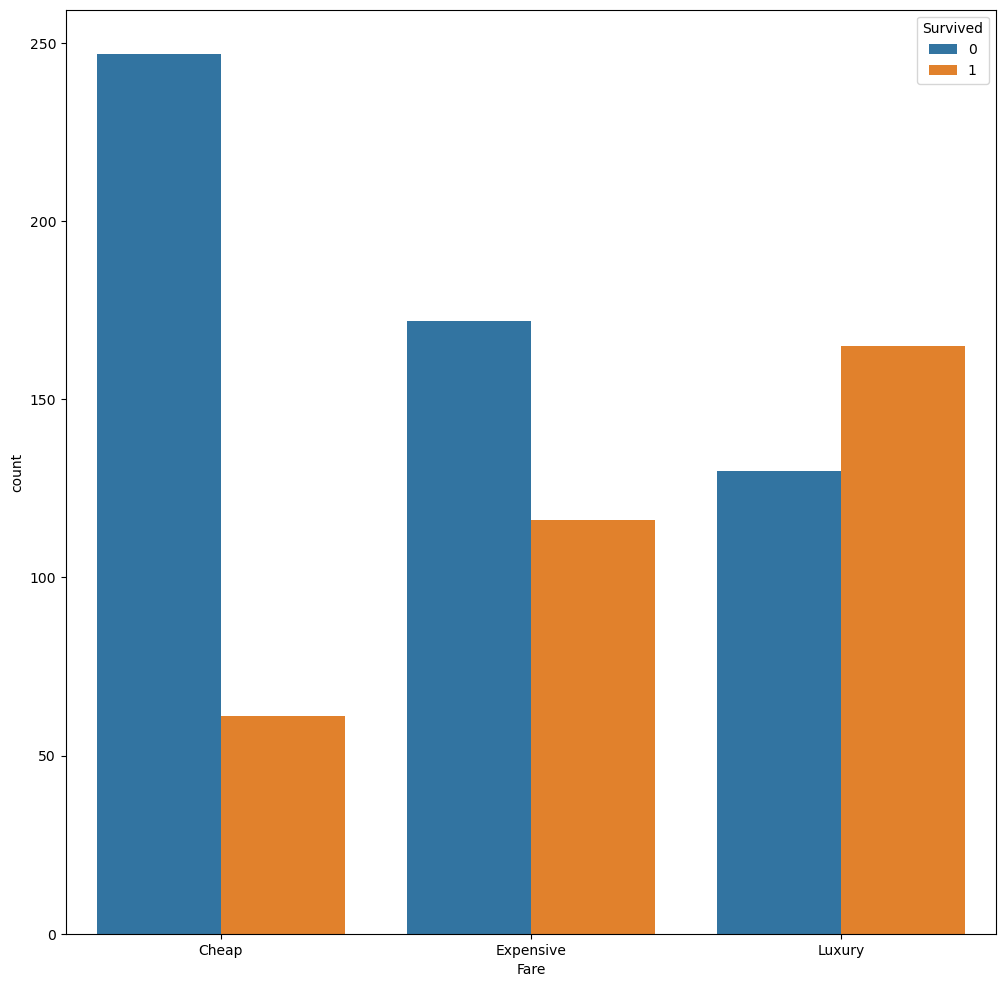

In [14]:
labels = ['Cheap', 'Expensive', 'Luxury']
bins = pd.qcut(df['Fare'], 3, labels=labels)
sns.countplot(x=bins)

plt.figure(figsize=(12,12))

#Dùng countplot để phân tích và lưu vào biến check2_sv
### BEGIN SOLUTION
check2_sv = sns.countplot(x=bins, hue=df["Survived"])
### END SOLUTION

buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
check2_sv = Image.open(buf)
plt.show()

**Nhận xét:** Ta nhận thấy ở mức giá vé cao hơn thì tỉ lệ sống sót sẽ được tăng mạnh.

## 2. Tính toán Correlation

Đây là một phần quan trọng trong phân tích dữ liệu, giúp chúng ta đo lường mối quan hệ giữa hai hoặc nhiều biến số. Mục tiêu của tính toán tương quan là xác định trong một tập dữ liệu, liệu có sự tương quan (liên quan) nào đó giữa các biến số hay không, và nếu có, thì mối quan hệ đó là mạnh đến mức nào và có hướng đi lên hoặc xuống.

Khi biết được mức độ tương quan giữa các biến số, chúng ta có thể dựa vào thông tin này để thực hiện các tác vụ quan trọng như lựa chọn đặc trưng cho mô hình máy học, dự đoán giá trị của một biến dựa trên biến khác, hoặc hiểu hơn về cách các biến tác động lẫn nhau trong một tập dữ liệu. Tính toán tương quan là một công cụ quan trọng trong khoa học dữ liệu và phân tích thống kê để giúp chúng ta hiểu sâu hơn về dữ liệu và đưa ra các quyết định có căn cứ dựa trên dữ liệu.

Ta xem lại dataframe và kiểm tra xem dataframe bị khuyết bao nhiêu điểm dữ liệu.

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Trong quá trình tiền xử lý dữ liệu, có một số bước quan trọng cần thực hiện:

1. Xóa cột "PassengerId" và "Name" từ dataframe. Việc này được thực hiện vì hai cột này không có sự ảnh hưởng đáng kể đến khả năng sống sót hoặc tử vong của hành khách. "PassengerId" chỉ là một số duy nhất đại diện cho mỗi hành khách mà không mang thông tin quan trọng, và "Name" chứa thông tin cá nhân về tên hành khách, cũng không ảnh hưởng đến sự sống còn.

2. Loại bỏ các dòng dữ liệu có giá trị bị thiếu (khuyết). Trong khuôn khổ bài này, chúng ta tạm thời không xử lý việc điền khuyết dữ liệu, mà chỉ xoá các dòng dữ liệu chứa giá trị trống. Điều này giúp đảm bảo rằng dữ liệu sau khi tiền xử lý sẽ không chứa giá trị thiếu, để có thể tiếp tục phân tích một cách chính xác.

3. Sử dụng kỹ thuật Ordinal Encoding cho cột "Sex" và "Embarked.". Trong trường hợp này, chúng ta ánh xạ giá trị "Sex" (giới tính) và "Embarked" (nơi lên tàu) thành giá trị số sao cho thứ tự tương quan giữa các giá trị vẫn được bảo toàn. Điều này giúp mô hình máy học hiểu được mối quan hệ và tương tác giữa các biến số.

In [23]:
### BEGIN SOLUTION
df = df.drop(["PassengerId", "Name"], axis=1)
df = df.dropna()

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
### END SOLUTION

Mục đích của việc làm trên là để biến dữ liệu dạng category thành numerical và bỏ hết giá trị NaN để tính toán correlation giữa các feature.

In [25]:
heatmap_val = df.corr()
heatmap_val

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,0.108517
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.108502
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,0.097129
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.004021
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.014082
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.176859
Embarked,0.108517,-0.108502,0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000


Để phân tích mối tương quan giữa các biến số, chúng ta sử dụng hàm `heatmap` từ thư viện `seaborn`. Trong quá trình vẽ heatmap, chúng ta cần truyền vào các tham số sau:

1. Giá trị của dataframe sau khi tính correlation, thường được lưu trong biến `heatmap_val`. Điều này đảm bảo chúng ta đang xem xét tương quan giữa các biến số trong tập dữ liệu.

2. Tham số `annot=True` để hiển thị giá trị số trên mỗi ô của heatmap. Nhờ điều này, chúng ta có thể xem chính xác giá trị tương quan giữa các cặp biến số.

Heatmap là một công cụ mạnh mẽ để trực quan hóa mối tương quan giữa các biến số trong dữ liệu. Bằng cách sử dụng heatmap, chúng ta có thể nhanh chóng nhận thấy các mối quan hệ mạnh hoặc yếu giữa các cặp biến số, điều này có thể hữu ích trong việc lựa chọn đặc trưng hoặc xác định cách các biến số tác động lẫn nhau trong mô hình phân tích dữ liệu.

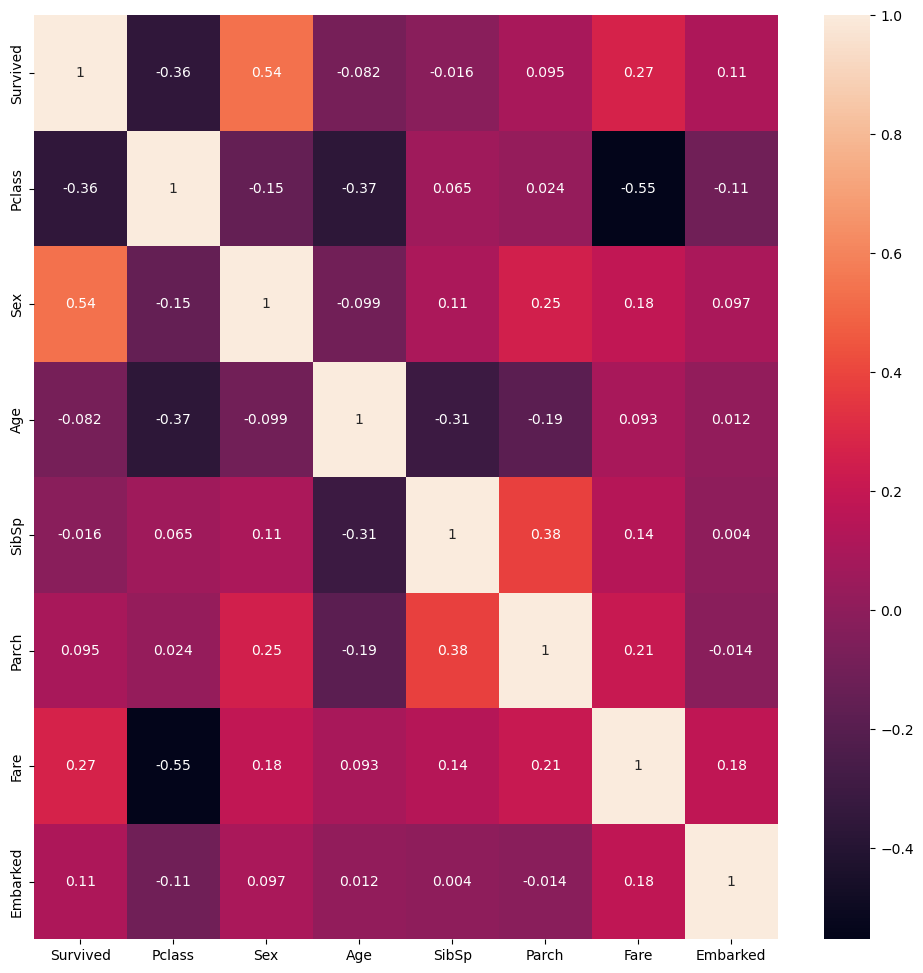

In [26]:
plt.figure(figsize=(12,12))
### BEGIN SOLUTION
sns.heatmap(heatmap_val, annot=True)
### END SOLUTION
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
check3_sv = Image.open(buf)
plt.show()

Không ngoài dự đoán, 2 feature `SibSp` và `Parch` có độ tương đồng cao nhất (0.38) trong các feature.